In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [104]:
data = pd.read_csv('Data/room_rent.csv')
data

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1
6,Electronic City,1200,14000,yes,1
7,Electronic City,1300,8700,yes,2
8,Electronic City,1300,6000,yes,2
9,Electronic City,1000,9000,yes,7


In [105]:
data.describe()

,Square_feet,Monthly_Rent,type
count,182.000000,182.000000,182.000000
mean,1251.153846,10894.752747,1.939560
std,342.349759,11374.546247,1.410958
min,300.000000,1105.000000,1.000000
25%,1100.000000,6800.000000,1.000000
50%,1205.000000,8000.000000,2.000000
75%,1300.000000,10000.000000,2.000000
max,3000.000000,100000.000000,7.000000


In [106]:
data.shape

(182, 5)

In [107]:
data = data.dropna()
data

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1
6,Electronic City,1200,14000,yes,1
7,Electronic City,1300,8700,yes,2
8,Electronic City,1300,6000,yes,2
9,Electronic City,1000,9000,yes,7


In [108]:
data.head(6)

,Area,Square_feet,Monthly_Rent,Furnished_home,type
0,Electronic City,1300,6550,yes,2
1,Electronic City,1300,6450,yes,1
2,Electronic City,1300,7150,yes,2
3,Electronic City,1000,7150,yes,1
4,Electronic City,1500,8050,yes,2
5,Electronic City,1300,7000,yes,1


In [109]:
data.tail(6)

,Area,Square_feet,Monthly_Rent,Furnished_home,type
176,HSR Layout,1000,70000,yes,4
177,HSR Layout,1200,37000,yes,3
178,HSR Layout,1200,14500,yes,1
179,HSR Layout,1600,12600,yes,1
180,HSR Layout,1300,13000,yes,2
181,HSR Layout,1300,13100,yes,1


In [110]:
s = data.columns
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 5 columns):
Area              182 non-null object
Square_feet       182 non-null int64
Monthly_Rent      182 non-null int64
Furnished_home    182 non-null object
type              182 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.1+ KB


In [112]:
data.shape

(182, 5)

In [113]:
data.size

910

In [114]:
data.describe()

,Square_feet,Monthly_Rent,type
count,182.000000,182.000000,182.000000
mean,1251.153846,10894.752747,1.939560
std,342.349759,11374.546247,1.410958
min,300.000000,1105.000000,1.000000
25%,1100.000000,6800.000000,1.000000
50%,1205.000000,8000.000000,2.000000
75%,1300.000000,10000.000000,2.000000
max,3000.000000,100000.000000,7.000000


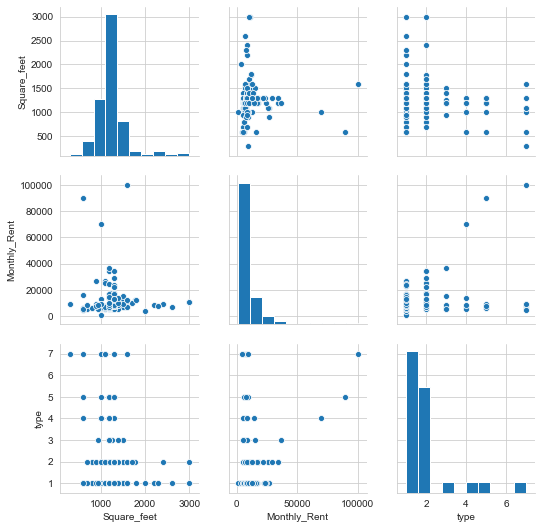

In [115]:
sns.pairplot(data)

In [116]:
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

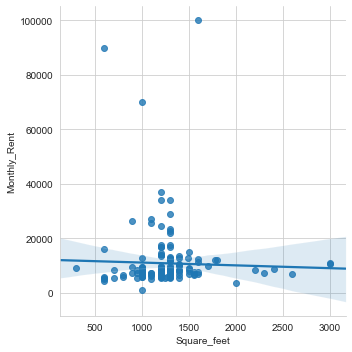

In [120]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Square_feet',y='Monthly_Rent', data = data)

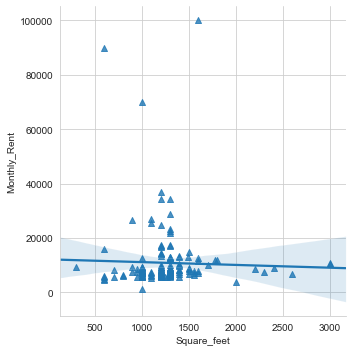

In [15]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Square_feet',y='Monthly_Rent', data = data,markers=['^'])

In [157]:
x_data = data[['Square_feet','type']]
x_data.head()

,Square_feet,type
0,1300,2
1,1300,1
2,1300,2
3,1000,1
4,1500,2


In [158]:
y_data = data[['Monthly_Rent']]
y_data.head()

,Monthly_Rent
0,6550
1,6450
2,7150
3,7150
4,8050


In [159]:
s

Index(['Area', 'Square_feet', 'Monthly_Rent', 'Furnished_home', 'type'], dtype='object')

In [129]:
#plt.scatter(x_data,y_data,marker='+',color='g')

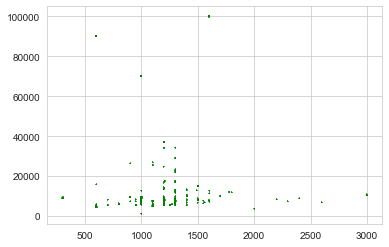

In [160]:
plt.scatter(data.Square_feet,data.Monthly_Rent,data.type,marker='+',color='g')

In [161]:
from sklearn.linear_model import LinearRegression
modle = LinearRegression()
rent_model = modle.fit(x_data,y_data)
rent_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
rent_model.coef_

array([[6.60678024e-01, 2.02640477e+03]])

In [163]:
rent_model.intercept_

array([6137.80837615])

In [164]:
rent_model.singular_

array([4605.84654972,   18.58999423])

In [165]:
rent_model.rank_

2

In [167]:
rent_model.score(x_data,y_data)

0.06155779675341433

In [166]:
rent_model.predict([[600,2]])

array([[10587.02472433]])

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.5)

In [169]:
x_train.shape

(91, 2)

In [170]:
x_test.shape

(91, 2)

In [171]:
y_train.shape

(91, 1)

In [172]:
y_test.shape

(91, 1)

In [173]:
y_test.shift

<bound method DataFrame.shift of      Monthly_Rent
171         23500
141         12450
175         22000
168         90000
23           7100
..            ...
57           7050
49           9000
119          8700
153          7500
99           5900

[91 rows x 1 columns]>

In [174]:
sk_model = modle.fit(x_train,y_train)
sk_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
sk_model.coef_

array([[   4.91554263, 2043.18737665]])

In [176]:
sk_model.intercept_

array([178.87699895])

In [178]:
sk_model.score(x_train,y_train)

0.09163154057132883

In [185]:
y_prediction = sk_model.predict(x_test)
y_prediction

array([[ 8612.26979662],
       [ 8612.26979662],
       [10655.45717327],
       [13344.13946113],
       [10655.45717327],
       [ 7706.13159434],
       [12207.09028676],
       [11638.56569958],
       [16293.46504006],
       [10163.90291011],
       [ 8612.26979662],
       [ 7137.60700715],
       [ 9180.7943838 ],
       [ 9595.37832293],
       [ 9841.15545451],
       [12621.67422589],
       [10163.90291011],
       [ 5171.38995453],
       [10655.45717327],
       [17430.51421443],
       [11147.01143642],
       [10655.45717327],
       [16062.55406798],
       [10163.90291011],
       [10655.45717327],
       [10655.45717327],
       [10163.90291011],
       [ 6154.49848084],
       [ 9103.82405977],
       [ 9180.7943838 ],
       [ 8612.26979662],
       [ 9103.82405977],
       [10163.90291011],
       [ 8612.26979662],
       [ 5662.94421769],
       [10163.90291011],
       [ 8120.71553346],
       [ 8120.71553346],
       [ 9546.22289661],
       [ 8612.26979662],


In [188]:
Error = y_prediction-y_test
Error

,Monthly_Rent
171,-14887.730203
141,-3837.730203
175,-11344.542827
168,-76655.860539
23,3555.457173
133,2206.131594
177,-24792.909713
4,3588.565700
86,10143.465040
104,3863.902910


In [190]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [191]:
mean_absolute_error(y_test,y_prediction)

5780.160031236262

In [192]:
"""fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x_train,y_train)
ax.plot(x_test,y_prediction)
ax.set_xlabel('sqare_feet')
ax.set_ylabel('Monthly_rent')"""

"fig,ax = plt.subplots(figsize=(10,5))\nax.scatter(x_train,y_train)\nax.plot(x_test,y_prediction)\nax.set_xlabel('sqare_feet')\nax.set_ylabel('Monthly_rent')"

In [194]:
mean_squared_error(y_test,y_prediction)

143395679.62180948

In [195]:
r2_score(y_test,y_prediction)

0.0008867677733120916